# Research Request - Non-Revenue Vehicle Fleet Sizes #1236

How many non-revenue vehicles do transit agencies have. 

Also known as "service vehicles", Non-revenue vehicle data are excluded from UPT, VRM, VRH reports (since these NRV are not meant to carry passengers or make revenue).

NRVs are like support vehicles used to maintain transit operations (service/maintenance vehicles, other support.

Service Vehicle Inventory (Form A-35): "Transit agencies are required to report data on service vehicles, or vehicles which do not carry passengers.


In [1]:
import requests
import json
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None)

GCS_PATH = "gs://calitp-analytics-data/data-analyses/ntd/"

In [81]:
# ping blackcat api to get 2024 blackcat data
api_2024 = "https://services.blackcattransit.com/api/APIModules/GetNTDReportsByYear/BCG_CA/2024"

response = requests.get(api_2024)

print(response) #got 200

# parse JSON
blob_2024 = response.json()

display(
    type(blob_2024),
    len(blob_2024)
)

<Response [200]>


list

86

## Exploring the blob JSON

[ ] = arrays. use index position (0,1,2) to accesss the different elements in the array


### Ultimate goal
 get a dataframe of organization name and A35 data

In [3]:
#blob_2024["Id"] this doesnt work, need to start by serching with ints

In [42]:
#blob_2024[0] # using int will return an agency's entire submission, keep this off for now since its long



JSON structure looks like this tho

starts with a list of dictionaries
access list with int, 
access dictionary using key value

can have nesested dictionaries (dictionaries within dictionaries)
can have list of dictionaires

```
[{'ReportId': 1138,
 'Organization': 'City of Arcata',
 'ReportPeriod': '2024',
 'ReportStatus': 'Submitted',
 'ReportLastModifiedDate': '10/29/2024 1:57:17 PM',
 'NTDReportingStationsAndMaintenance': {'Data': [{'Id': 536,...
 ,
 'NTDTransitAssetManagementA15': {'Data':...
```

In [18]:
# access organiztion name
# first org is "City of Arcata"

display(
    blob_2024[0]["Organization"],
    blob_2024[30]["Organization"]
)
# this is how you access each org in the blob
# blob[0] is City of Arcata

'City of Arcata'

'City of Guadalupe'

In [20]:
# access NTDReportingA35
blob_2024[0]["NTDReportingA35"]
# what the A35 looks like for Arcata

1


{'Data': [{'Id': 336,
   'ReportId': 1138,
   'EquipmentName': 'Service Vehicle Ford Escape',
   'EquipmentId': 275,
   'VehicleType': 'Trucks and Other Rubber Tire Vehicles',
   'PrimaryMode': 'MB - Bus',
   'SecondaryMode': '',
   'TotalVehicles': None,
   'UsefulLifeBenchmark': False,
   'YearOfManufacture': 2005,
   'TransitAgencyCapitalResponsibility': '',
   'EstimatedCost': None,
   'YearDollarsEstimatedCost': None,
   'UsefulLifeYearsBenchMark': None,
   'UsefulLifeYearsRemaining': None,
   'LastModifiedDate': '2024-10-29T21:07:27.03'},
  {'Id': 337,
   'ReportId': 1138,
   'EquipmentName': 'Service Vehicle Ford Fusion',
   'EquipmentId': 276,
   'VehicleType': 'Automobiles',
   'PrimaryMode': 'MB - Bus',
   'SecondaryMode': '',
   'TotalVehicles': None,
   'UsefulLifeBenchmark': False,
   'YearOfManufacture': 2012,
   'TransitAgencyCapitalResponsibility': '',
   'EstimatedCost': None,
   'YearDollarsEstimatedCost': None,
   'UsefulLifeYearsBenchMark': None,
   'UsefulLifeYears

In [6]:
# accessing data portion in A35
print(len(blob_2024[0]["NTDReportingA35"]["Data"]))

blob_2024[0]["NTDReportingA35"]["Data"]

3


[{'Id': 336,
  'ReportId': 1138,
  'EquipmentName': 'Service Vehicle Ford Escape',
  'EquipmentId': 275,
  'VehicleType': 'Trucks and Other Rubber Tire Vehicles',
  'PrimaryMode': 'MB - Bus',
  'SecondaryMode': '',
  'TotalVehicles': None,
  'UsefulLifeBenchmark': False,
  'YearOfManufacture': 2005,
  'TransitAgencyCapitalResponsibility': '',
  'EstimatedCost': None,
  'YearDollarsEstimatedCost': None,
  'UsefulLifeYearsBenchMark': None,
  'UsefulLifeYearsRemaining': None,
  'LastModifiedDate': '2024-10-29T21:07:27.03'},
 {'Id': 337,
  'ReportId': 1138,
  'EquipmentName': 'Service Vehicle Ford Fusion',
  'EquipmentId': 276,
  'VehicleType': 'Automobiles',
  'PrimaryMode': 'MB - Bus',
  'SecondaryMode': '',
  'TotalVehicles': None,
  'UsefulLifeBenchmark': False,
  'YearOfManufacture': 2012,
  'TransitAgencyCapitalResponsibility': '',
  'EstimatedCost': None,
  'YearDollarsEstimatedCost': None,
  'UsefulLifeYearsBenchMark': None,
  'UsefulLifeYearsRemaining': None,
  'LastModifiedDate':

In [7]:
# accessing 1st entry in a35 data for Arcata

blob_2024[0]["NTDReportingA35"]["Data"][0]

{'Id': 336,
 'ReportId': 1138,
 'EquipmentName': 'Service Vehicle Ford Escape',
 'EquipmentId': 275,
 'VehicleType': 'Trucks and Other Rubber Tire Vehicles',
 'PrimaryMode': 'MB - Bus',
 'SecondaryMode': '',
 'TotalVehicles': None,
 'UsefulLifeBenchmark': False,
 'YearOfManufacture': 2005,
 'TransitAgencyCapitalResponsibility': '',
 'EstimatedCost': None,
 'YearDollarsEstimatedCost': None,
 'UsefulLifeYearsBenchMark': None,
 'UsefulLifeYearsRemaining': None,
 'LastModifiedDate': '2024-10-29T21:07:27.03'}

In [8]:
# accessing speficif field, equipment name, from the first entry in a35 data for Arcata

blob_2024[0]["NTDReportingA35"]["Data"][0]["EquipmentName"]

'Service Vehicle Ford Escape'

In [9]:
# can i see org name and a35 data at the same time?
display(
    blob_2024[0]["Organization"],
    blob_2024[0]["NTDReportingA35"]["Data"]
)

'City of Arcata'

[{'Id': 336,
  'ReportId': 1138,
  'EquipmentName': 'Service Vehicle Ford Escape',
  'EquipmentId': 275,
  'VehicleType': 'Trucks and Other Rubber Tire Vehicles',
  'PrimaryMode': 'MB - Bus',
  'SecondaryMode': '',
  'TotalVehicles': None,
  'UsefulLifeBenchmark': False,
  'YearOfManufacture': 2005,
  'TransitAgencyCapitalResponsibility': '',
  'EstimatedCost': None,
  'YearDollarsEstimatedCost': None,
  'UsefulLifeYearsBenchMark': None,
  'UsefulLifeYearsRemaining': None,
  'LastModifiedDate': '2024-10-29T21:07:27.03'},
 {'Id': 337,
  'ReportId': 1138,
  'EquipmentName': 'Service Vehicle Ford Fusion',
  'EquipmentId': 276,
  'VehicleType': 'Automobiles',
  'PrimaryMode': 'MB - Bus',
  'SecondaryMode': '',
  'TotalVehicles': None,
  'UsefulLifeBenchmark': False,
  'YearOfManufacture': 2012,
  'TransitAgencyCapitalResponsibility': '',
  'EstimatedCost': None,
  'YearDollarsEstimatedCost': None,
  'UsefulLifeYearsBenchMark': None,
  'UsefulLifeYearsRemaining': None,
  'LastModifiedDate':

## List comprehension to get list of org name and a35 data

In [10]:
# testing list comprehension to access org name and a35 data

filtered_data = [
    {
        "Organization":i["Organization"], 
        "data":i["NTDReportingA35"]["Data"]
    } for i in blob_2024
]


In [97]:
# checking len of list
display(
    len(filtered_data), # 86 orgs
    len(filtered_data[0]["data"]), # 3 entries in org 0
    filtered_data[0]["Organization"]
)

86

3

'City of Arcata'

In [89]:
range(len(filtered_data))

range(0, 86)

In [113]:
for i in range(len(filtered_data)):
    if len(filtered_data[i]["data"])>0:
        print(filtered_data[i]["Organization"],",", len(filtered_data[i]["data"])) # 19 agencies, 

# since this is a list, cant use regular pandas methods.
# List of agencies with count of services vehicles greater than zero

City of Arcata , 3
Humboldt Transit Authority , 10
Mendocino Transit Authority , 9
Lassen Transit Service Agency , 1
Colusa County Transit Agency , 2
County of Nevada Public Works, Transit Services Division , 6
San Benito County Local Transportation Authority , 1
Fresno County Rural Transit Agency , 3
Morongo Basin Transit Authority , 8
Mountain Area Regional Transit Authority , 13
City of Ridgecrest , 1
Eastern Sierra Transit Authority , 9
Amador Transit , 3
Tuolumne County Transit Agency (TCTA) , 1
County of Siskiyou , 5
Trinity County Department of Transportation  , 1
Tehama County Transit Agency , 1
Calaveras Transit Agency  , 1
Palo Verde Valley Transit Agency , 6


In [ ]:
for i in range(len(filtered_data)):
    if filtered_data[i]["data"] is not None:
        print(filtered_data[i]["Organization"],",", len(filtered_data[i]["data"]) )

# List of agencies with count of services vehicles greater not Null

## Test of using `pd.json_normalize`
data = unserialiszed JSON object

In [82]:
df_blob = pd.json_normalize(
    blob_2024,
    record_path = ["NTDReportingA35", "Data"],
    meta="Organization",
    
)

In [83]:
display(
    len(df_blob),
    type(df_blob)
)

84

pandas.core.frame.DataFrame

In [126]:
display(
    df_blob.info(),
    df_blob.describe()
)
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Id                                  84 non-null     int64  
 1   ReportId                            84 non-null     int64  
 2   EquipmentName                       84 non-null     object 
 3   EquipmentId                         84 non-null     int64  
 4   VehicleType                         84 non-null     object 
 5   PrimaryMode                         78 non-null     object 
 6   SecondaryMode                       61 non-null     object 
 7   TotalVehicles                       17 non-null     float64
 8   UsefulLifeBenchmark                 84 non-null     bool   
 9   YearOfManufacture                   84 non-null     int64  
 10  TransitAgencyCapitalResponsibility  68 non-null     object 
 11  EstimatedCost                       16 non-null

None

,Id,ReportId,EquipmentId,TotalVehicles,YearOfManufacture,EstimatedCost,YearDollarsEstimatedCost,UsefulLifeYearsBenchMark,UsefulLifeYearsRemaining
count,84.000000,84.000000,84.000000,17.000000,84.000000,16.000000,7.000000,17.000000,17.000000
mean,295.928571,1069.428571,191.666667,0.882353,2012.440476,42697.462500,2022.285714,9.941176,-0.176471
std,30.986505,42.913835,69.657913,0.485071,7.445143,26523.282861,0.755929,6.675240,4.952718
min,247.000000,1011.000000,67.000000,-1.000000,1988.000000,2500.000000,2022.000000,5.000000,-8.000000
25%,267.750000,1044.000000,129.000000,1.000000,2007.750000,34675.000000,2022.000000,5.000000,-4.000000
50%,295.500000,1054.000000,201.500000,1.000000,2013.000000,35000.000000,2022.000000,8.000000,0.000000
75%,327.250000,1109.500000,238.250000,1.000000,2018.000000,48384.500000,2022.000000,8.000000,1.000000
max,348.000000,1139.000000,303.000000,1.000000,2024.000000,120000.000000,2024.000000,27.000000,11.000000


In [100]:
df_blob["Organization"].nunique() # 19, same number of agencies in filtered_data list 

19

In [120]:
df_blob["EquipmentId"].count() # 84 service vehicles in 19 agencies

84

## Querying `fct_vehicles_type_count_by_agency`

has a column called `total_service_vehicles`

In [121]:
from calitp_data_analysis.tables import tbls
from siuba import _, filter, count, collect, show_query


In [143]:
keep_cols=[
    "ntd_id",
    "agency",
    "city",
    "organization_type",
    "reporter_type",
    "agency_voms",
    "total_revenue_vehicles",
    "total_service_vehicles"
]

test = (
    tbls.mart_ntd_annual_reporting.fct_vehicles_type_count_by_agency()
    >> filter(
        _.state == 'CA',
        _.report_year == 2023
    )
    >> collect()
)[keep_cols]


In [144]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ntd_id                  225 non-null    object 
 1   agency                  225 non-null    object 
 2   city                    224 non-null    object 
 3   organization_type       225 non-null    object 
 4   reporter_type           225 non-null    object 
 5   agency_voms             225 non-null    float64
 6   total_revenue_vehicles  225 non-null    float64
 7   total_service_vehicles  225 non-null    float64
dtypes: float64(3), object(5)
memory usage: 14.2+ KB


In [145]:
test.describe()

,agency_voms,total_revenue_vehicles,total_service_vehicles
count,225.000000,225.000000,225.000000
mean,74.408889,106.217778,23.680000
std,228.011262,335.632827,119.112585
min,0.000000,0.000000,0.000000
25%,4.000000,7.000000,0.000000
50%,13.000000,19.000000,0.000000
75%,40.000000,60.000000,7.000000
max,2651.000000,4060.000000,1498.000000


In [146]:
test.head()

,ntd_id,agency,city,organization_type,reporter_type,agency_voms,total_revenue_vehicles,total_service_vehicles
0,90003,"San Francisco Bay Area Rapid Transit District, dba: SF BART",Oakland,Independent Public Agency or Authority of Transit Service,Full Reporter,582.0,846.0,660.0
1,90004,Golden Empire Transit District,Bakersfield,Independent Public Agency or Authority of Transit Service,Full Reporter,89.0,137.0,26.0
2,90006,Santa Cruz Metropolitan Transit District,Santa Cruz,Independent Public Agency or Authority of Transit Service,Full Reporter,93.0,125.0,41.0
3,90008,"City of Santa Monica, dba: Big Blue Bus",Santa Monica,"City, County or Local Government Unit or Department of Transportation",Full Reporter,143.0,221.0,20.0
4,90009,"San Mateo County Transit District, dba: SamTrans",San Carlos,Independent Public Agency or Authority of Transit Service,Full Reporter,331.0,434.0,78.0


In [155]:
test.sort_values(by="total_service_vehicles", ascending=False).head()

,ntd_id,agency,city,organization_type,reporter_type,agency_voms,total_revenue_vehicles,total_service_vehicles
55,90154,"Los Angeles County Metropolitan Transportation Authority , dba: Metro",Los Angeles,Independent Public Agency or Authority of Transit Service,Full Reporter,2651.0,4060.0,1498.0
0,90003,"San Francisco Bay Area Rapid Transit District, dba: SF BART",Oakland,Independent Public Agency or Authority of Transit Service,Full Reporter,582.0,846.0,660.0
9,90015,"City and County of San Francisco, dba: San Francisco Municipal Transportation Agency",San Francisco,"City, County or Local Government Unit or Department of Transportation",Full Reporter,774.0,1295.0,544.0
7,90013,"Santa Clara Valley Transportation Authority, dba: Valley Transportation Authority",San Jose,Independent Public Agency or Authority of Transit Service,Full Reporter,512.0,737.0,356.0
12,90019,"Sacramento Regional Transit District, dba: Sacramento RT",Sacramento,Independent Public Agency or Authority of Transit Service,Full Reporter,374.0,494.0,207.0


<AxesSubplot:xlabel='agency'>

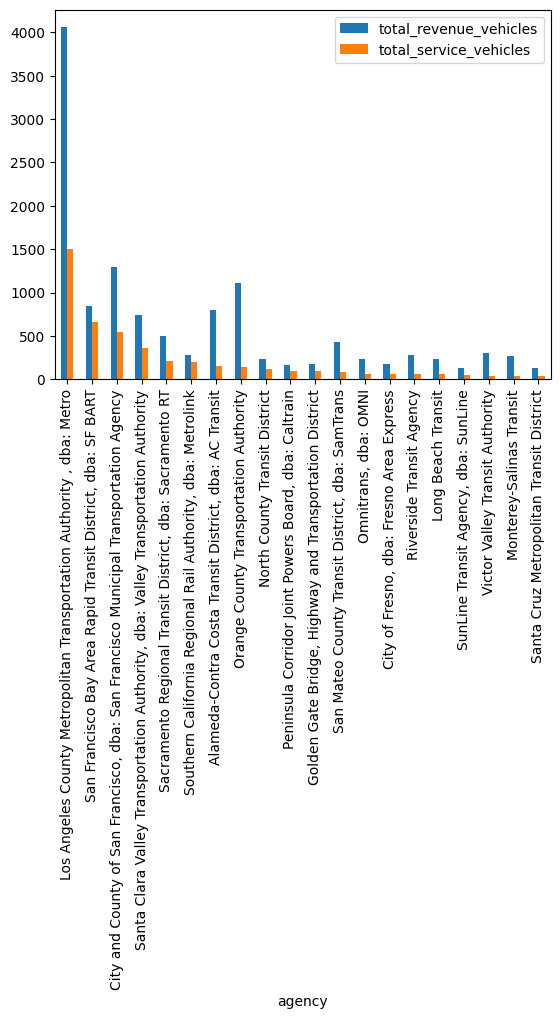

In [158]:
test.sort_values(by="total_service_vehicles", ascending=False)[:20].plot(
    x = "agency",
    y = ["total_revenue_vehicles","total_service_vehicles"],
    kind = "bar",
    #ylim=(0,2000)
)